<a href="https://colab.research.google.com/github/rmontteiro/bemstaranimal_cluster/blob/main/bem_estar_animal_sempop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Importar as bibliotecas necessárias e montar o Google Drive


IMPORTAÇÃO DE BIBLIOTECAS

INSTALL LIBRARIES

In [ ]:
!pip install mplfinance


IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import mplfinance as mpf
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from IPython.display import display

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/PLANILHA BASE indicadores BEA_26072023.xlsx')

In [ ]:
# Remove the row with the municipality "Presidente Kennedy" from df1 and save the result in df2
## df1 = df1[df1['municipio'] != "Presidente Kennedy"].copy()

In [ ]:
df1.head()

,municipio,arrecadado_2022,total_pop,arrecadado_percapta,pop_cad_único,porcentagem %
0,Afonso Cláudio,1.288334e+08,30603,4209.828061,12000,0.392118
1,Águia Branca,6.856872e+07,9714,7058.751960,4976,0.512250
2,Água Doce do Norte,6.043205e+07,12038,5020.107458,6938,0.576342
3,Alegre,1.546957e+08,26397,5860.350050,8745,0.331288
4,Alfredo Chaves,8.708908e+07,13303,6546.574776,4567,0.343306


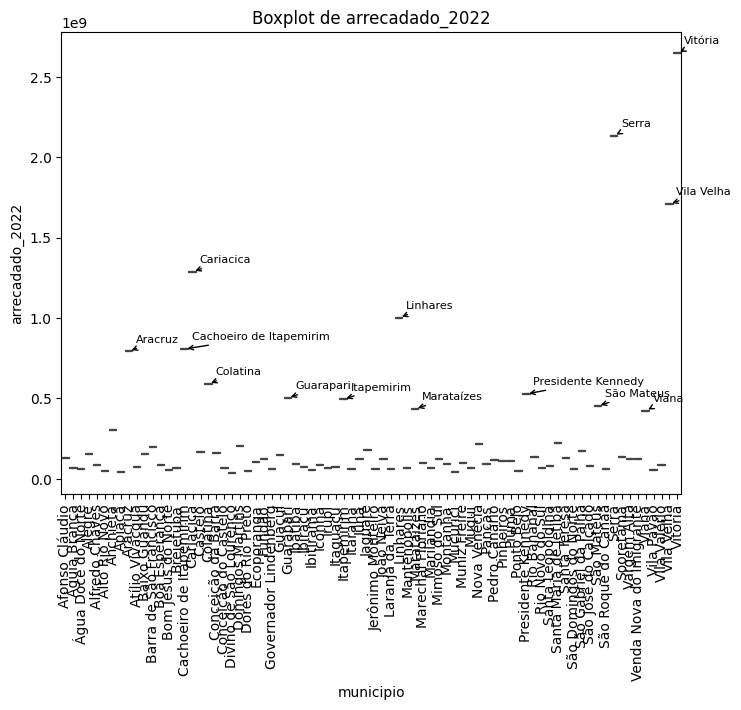

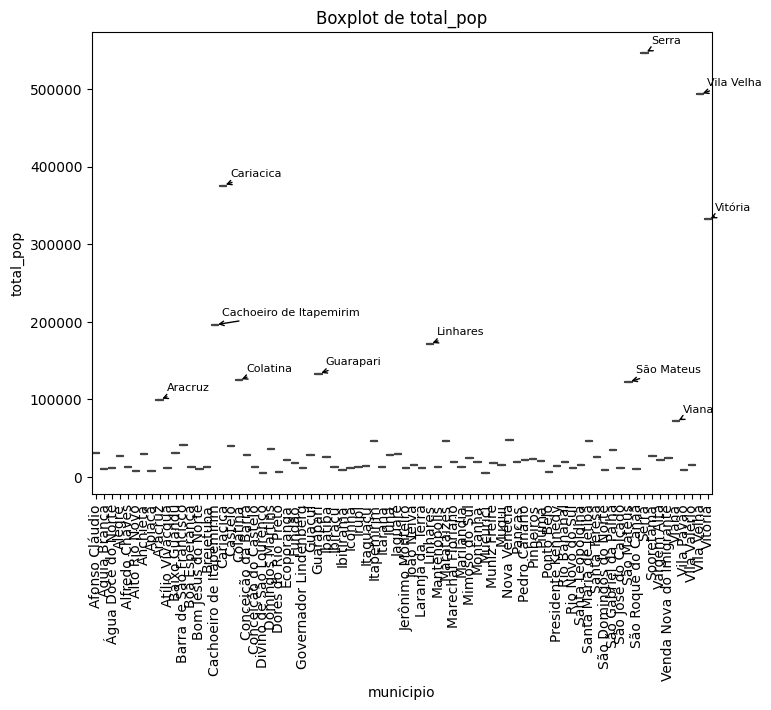

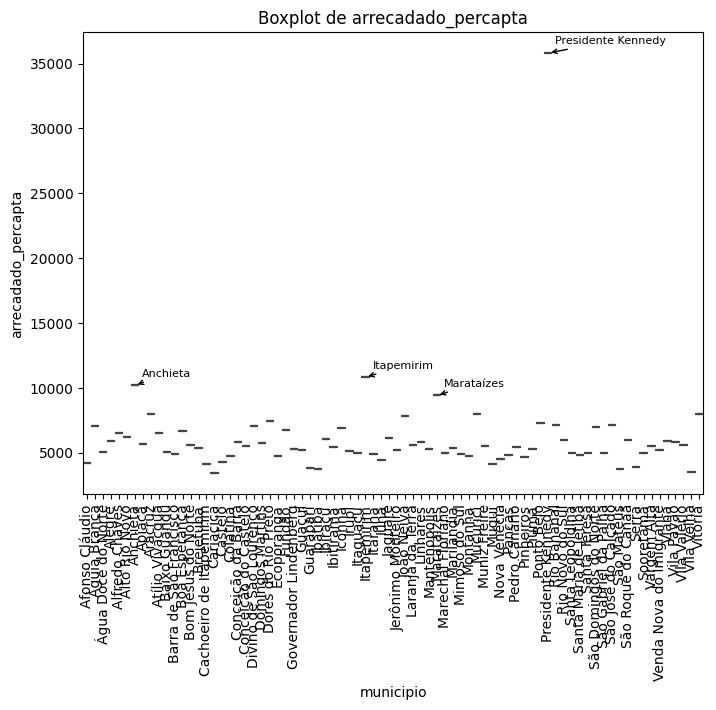

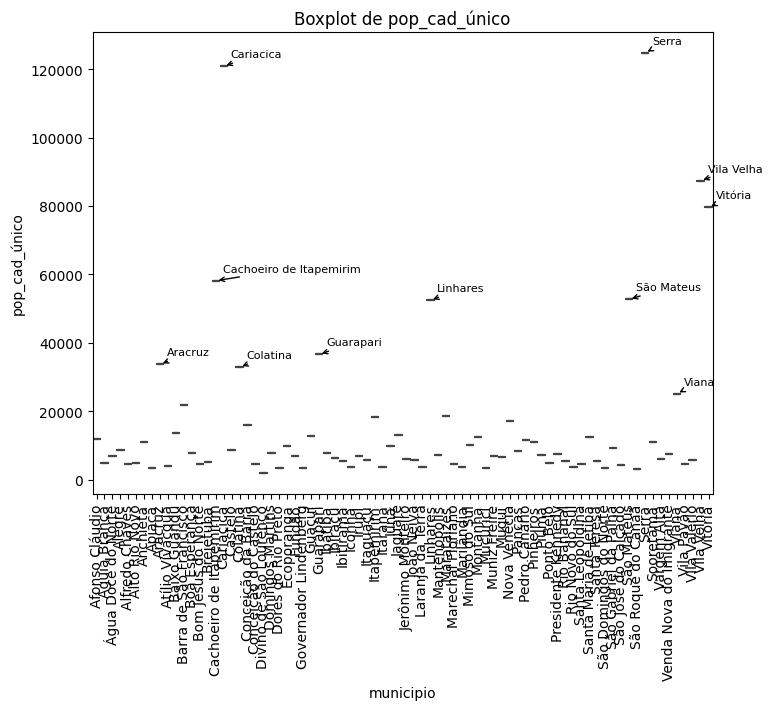

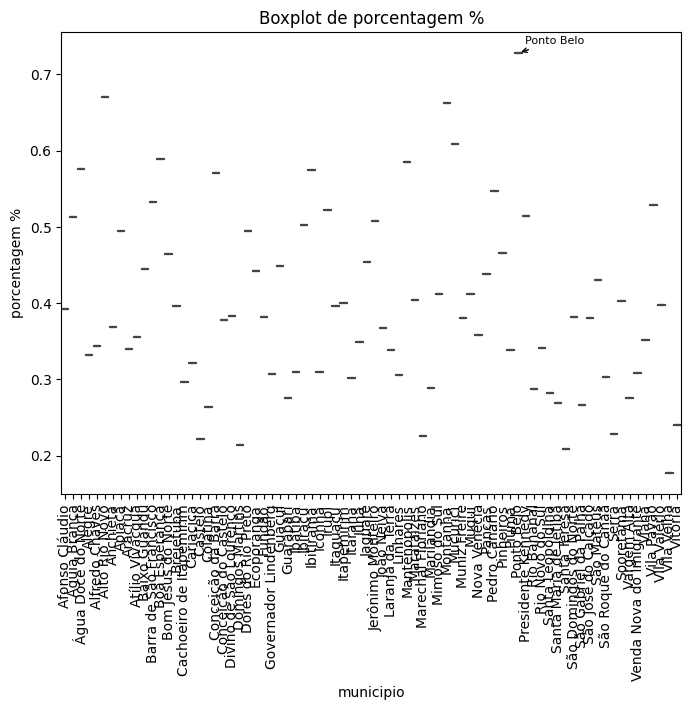

In [ ]:
# Lista das colunas que deseja plotar os boxplots
colunas_boxplot = ['arrecadado_2022', 'total_pop', 'arrecadado_percapta', 'pop_cad_único', 'porcentagem %']

# Exibição dos 3 gráficos boxplot em sequência
for coluna in colunas_boxplot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='municipio', y=coluna, data=df1)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot de {coluna}')

    # Adicionar anotações para os outliers
    outliers = df1[coluna][df1[coluna] > df1[coluna].quantile(0.75) + 1.5 * (df1[coluna].quantile(0.75) - df1[coluna].quantile(0.25))]
    for outlier in outliers.index:
        plt.annotate(df1.loc[outlier, 'municipio'],
                     xy=(outlier, df1.loc[outlier, coluna]),
                     xytext=(5, 5),
                     textcoords='offset points',
                     ha='left',
                     va='bottom',
                     fontsize=8,
                     arrowprops=dict(arrowstyle='->', lw=1, color='black'))

    plt.show()

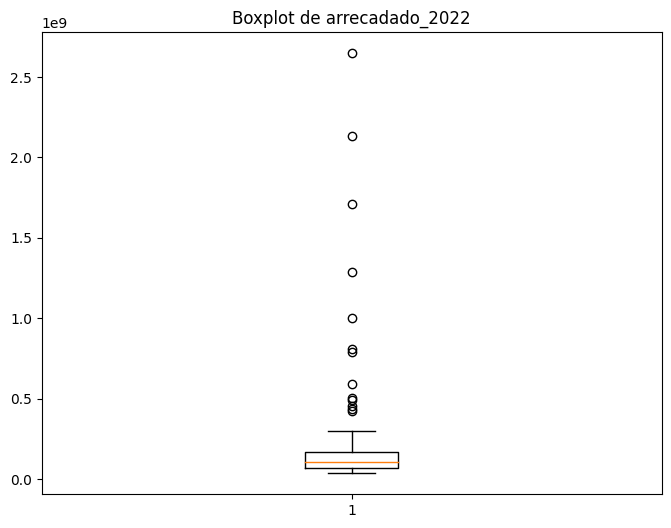

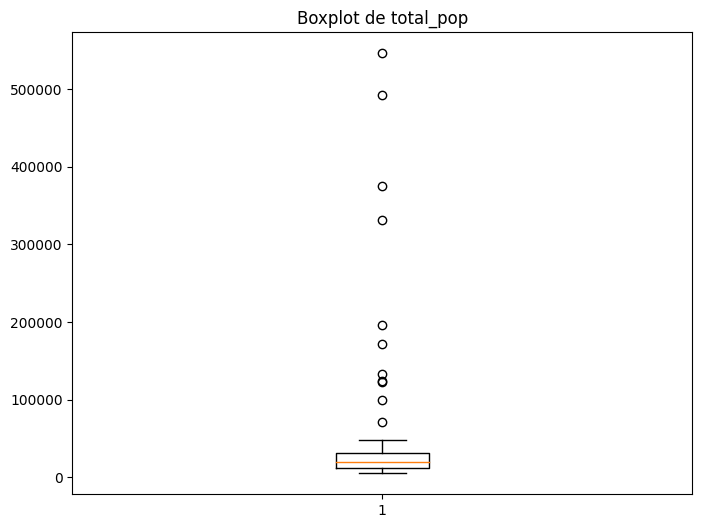

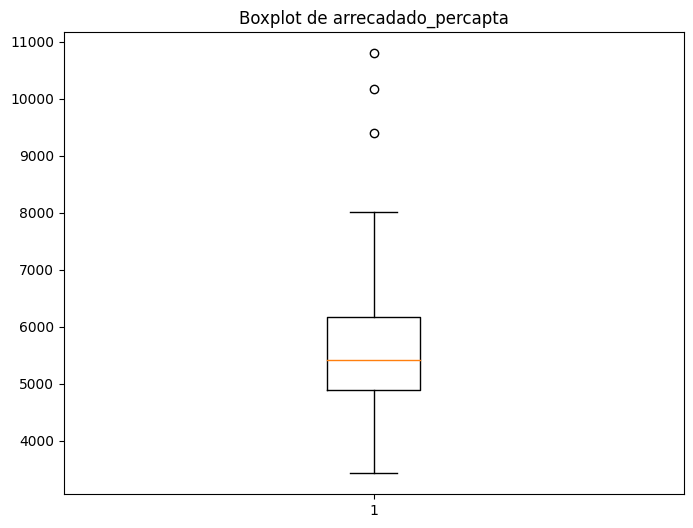

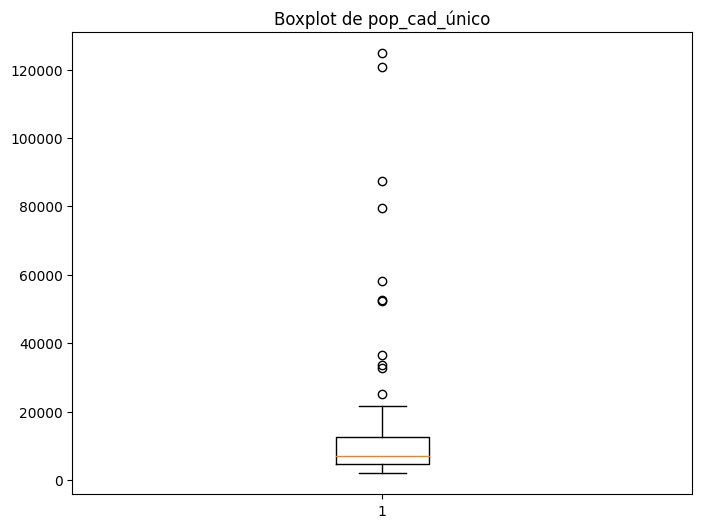

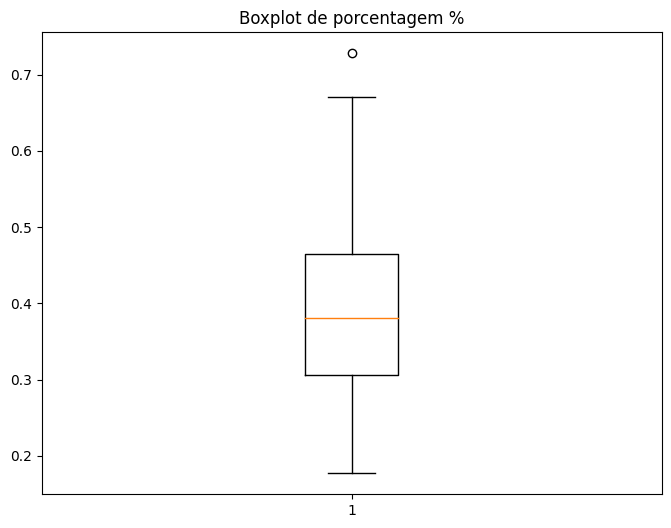

In [ ]:
# Lista das colunas que deseja plotar os boxplots
colunas_boxplot = ['arrecadado_2022', 'total_pop', 'arrecadado_percapta', 'pop_cad_único', 'porcentagem %']

# Exibição dos 3 gráficos boxplot em sequência
for coluna in colunas_boxplot:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df1[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

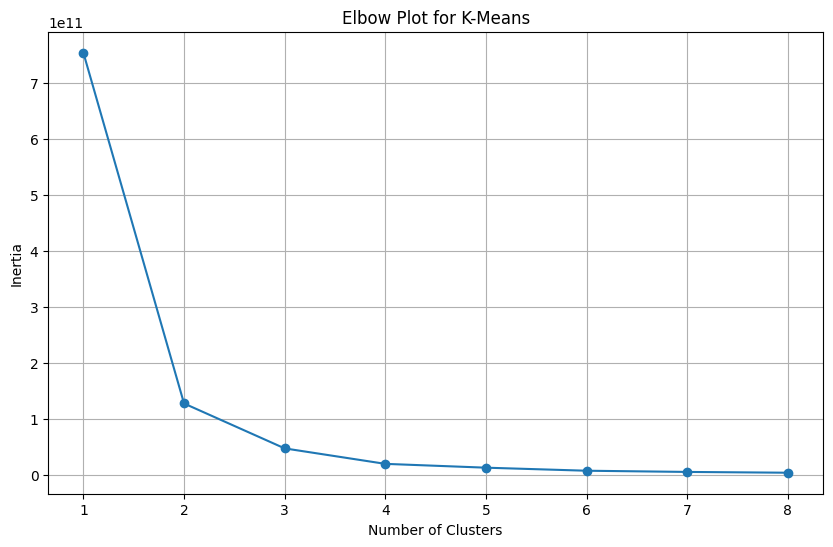

In [ ]:
# Select the columns for the K-Means analysis
#columns_for_kmeans = ['total_pop', 'arrecadado_percapta', 'porcentagem %']
columns_for_kmeans = ['total_pop', 'porcentagem %']
kmeans_data = df1[columns_for_kmeans]

# Compute the inertia for different numbers of clusters
inertia_values = []
max_clusters = 8
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(kmeans_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot to identify the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-Means')
plt.grid(True)
plt.show()

In [ ]:
# Select the columns for the K-Means and Z-score analysis
# vetores = df1[['total_pop', 'arrecadado_percapta', 'porcentagem %']] //Alternativa com 3 vetores
vetores = df1[['arrecadado_percapta', 'porcentagem %']]

# Define the number of clusters and maximum iterations
num_clusters = 5
max_iteracoes = (1*(10^9))

# Create and fit the K-Means model
modelo_kmeans = KMeans(n_clusters=num_clusters, max_iter=max_iteracoes)
modelo_kmeans.fit(vetores)

# Get the cluster labels and add them to the original DataFrame
df1['cluster'] = modelo_kmeans.labels_

# Get unique cluster labels for coloring
unique_clusters = df1['cluster'].unique()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the results, including the 'municipio' column and the assigned cluster
print(df1[['municipio', 'total_pop', 'arrecadado_percapta', 'porcentagem %', 'cluster']])

             municipio  total_pop  arrecadado_percapta  porcentagem %  cluster
0       Afonso Cláudio      30603          4209.828061       0.392118        4
1         Águia Branca       9714          7058.751960       0.512250        3
2   Água Doce do Norte      12038          5020.107458       0.576342        0
3               Alegre      26397          5860.350050       0.331288        0
4       Alfredo Chaves      13303          6546.574776       0.343306        3
..                 ...        ...                  ...            ...      ...
73               Viana      71443          5914.382420       0.351483        0
74          Vila Pavão       8890          5800.201765       0.528009        0
75        Vila Valério      14764          5621.016276       0.397453        0
76          Vila Velha     493242          3462.934028       0.177254        4
77             Vitória     331785          7979.897005       0.239948        3

[78 rows x 5 columns]


In [ ]:
# Count the number of municipalities grouped in each cluster
cluster_counts = df1['cluster'].value_counts()
# Display the result of the count for each cluster
print(cluster_counts)


0    46
3    16
4    12
2     3
1     1
Name: cluster, dtype: int64


In [ ]:
# Get unique cluster labels for coloring
unique_clusters = df1['cluster'].unique()

# Function to identify outliers using Z-score
def identify_outliers(series, threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    return z_scores > threshold

# Identify outliers in each of the vectors
outliers_POP = identify_outliers(df1['total_pop'])
outliers_arrecadado = identify_outliers(df1['arrecadado_percapta'])
outliers_porcentagem = identify_outliers(df1['porcentagem %'])

# Mark outliers as a new column in the DataFrame
df1['outlier_total_pop'] = outliers_POP
df1['outlier_arrecadado'] = outliers_arrecadado
df1['outlier_porcentagem'] = outliers_porcentagem


In [ ]:
display(df1)

,municipio,arrecadado_2022,total_pop,arrecadado_percapta,pop_cad_único,porcentagem %,cluster,outlier_total_pop,outlier_arrecadado,outlier_porcentagem
0,Afonso Cláudio,1.288334e+08,30603,4209.828061,12000,0.392118,4,False,False,False
1,Águia Branca,6.856872e+07,9714,7058.751960,4976,0.512250,3,False,False,False
2,Água Doce do Norte,6.043205e+07,12038,5020.107458,6938,0.576342,0,False,False,False
3,Alegre,1.546957e+08,26397,5860.350050,8745,0.331288,0,False,False,False
4,Alfredo Chaves,8.708908e+07,13303,6546.574776,4567,0.343306,3,False,False,False
...,...,...,...,...,...,...,...,...,...,...
73,Viana,4.225412e+08,71443,5914.382420,25111,0.351483,0,False,False,False
74,Vila Pavão,5.156379e+07,8890,5800.201765,4694,0.528009,0,False,False,False
75,Vila Valério,8.298868e+07,14764,5621.016276,5868,0.397453,0,False,False,False
76,Vila Velha,1.708065e+09,493242,3462.934028,87429,0.177254,4,True,False,False


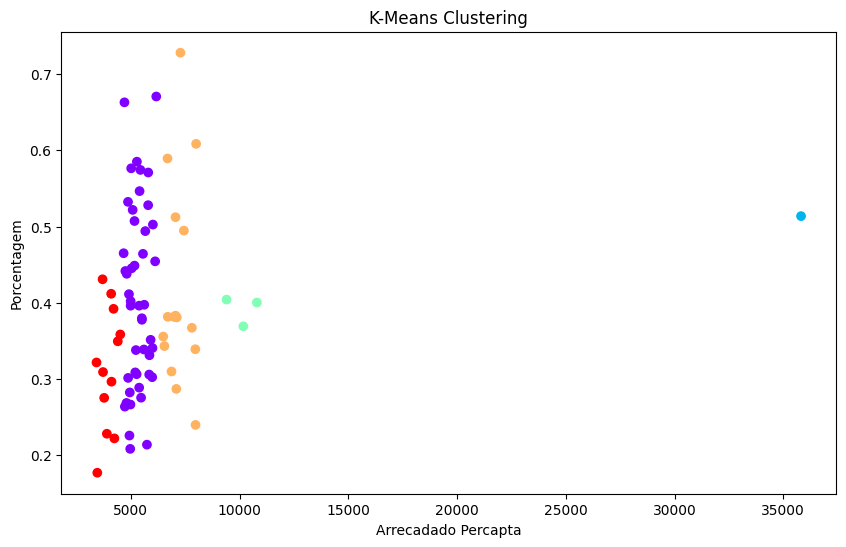

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1['arrecadado_percapta'], df1['porcentagem %'], c=df1['cluster'], cmap='rainbow')
plt.xlabel('Arrecadado Percapta')
plt.ylabel('Porcentagem')
plt.title('K-Means Clustering')
plt.show()

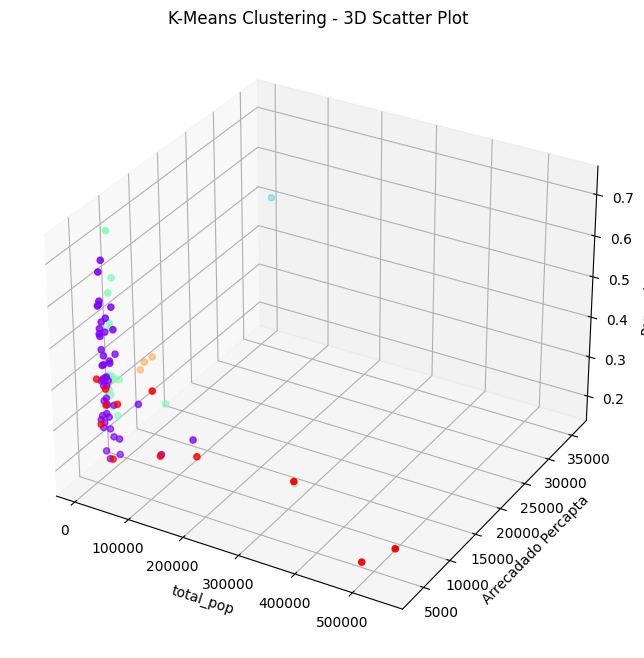

In [ ]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['total_pop'], df1['arrecadado_percapta'], df1['porcentagem %'], c=df1['cluster'], cmap='rainbow')
ax.set_xlabel('total_pop')
ax.set_ylabel('Arrecadado Percapta')
ax.set_zlabel('Porcentagem')
ax.set_title('K-Means Clustering - 3D Scatter Plot')
plt.show()

<ipython-input-291-597991045364>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster_df['total_pop'], cluster_df['arrecadado_percapta'], cluster_df['porcentagem %'],


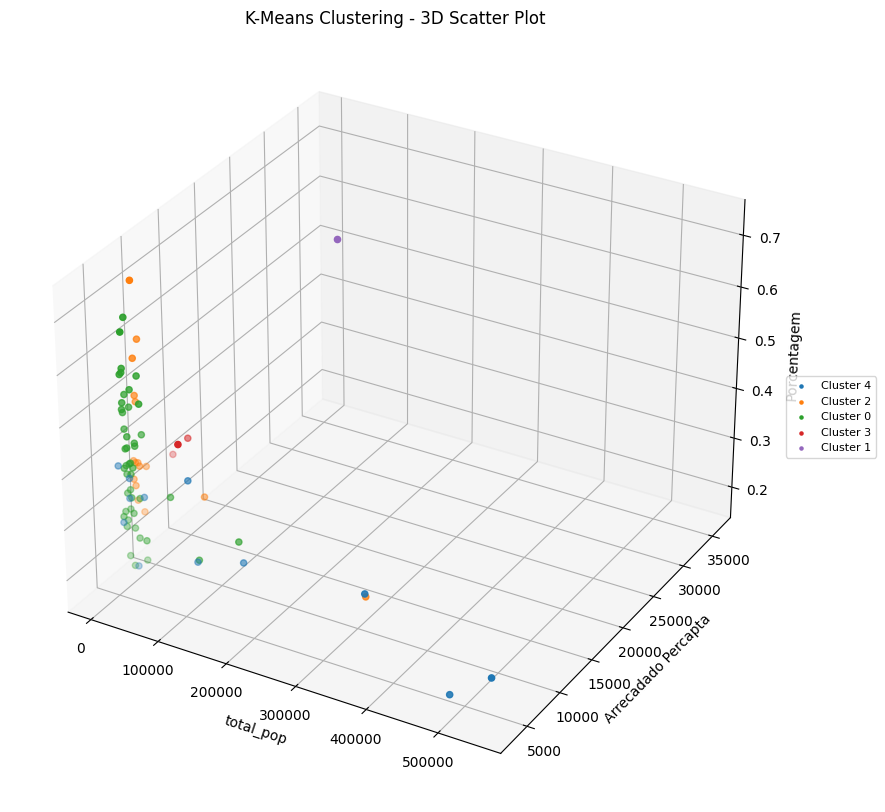

,municipio,arrecadado_2022,total_pop,arrecadado_percapta,pop_cad_único,porcentagem %,cluster,outlier_total_pop,outlier_arrecadado,outlier_porcentagem
0,Afonso Cláudio,1.288334e+08,30603,4209.828061,12000,0.392118,4,False,False,False
1,Águia Branca,6.856872e+07,9714,7058.751960,4976,0.512250,2,False,False,False
2,Água Doce do Norte,6.043205e+07,12038,5020.107458,6938,0.576342,0,False,False,False
3,Alegre,1.546957e+08,26397,5860.350050,8745,0.331288,0,False,False,False
4,Alfredo Chaves,8.708908e+07,13303,6546.574776,4567,0.343306,2,False,False,False
...,...,...,...,...,...,...,...,...,...,...
73,Viana,4.225412e+08,71443,5914.382420,25111,0.351483,0,False,False,False
74,Vila Pavão,5.156379e+07,8890,5800.201765,4694,0.528009,0,False,False,False
75,Vila Valério,8.298868e+07,14764,5621.016276,5868,0.397453,0,False,False,False
76,Vila Velha,1.708065e+09,493242,3462.934028,87429,0.177254,4,True,False,False


In [ ]:
# Get unique cluster labels for coloring
unique_clusters = df1['cluster'].unique()

# 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points with labels and colors for each cluster
for cluster_label in unique_clusters:
    cluster_df = df1[df1['cluster'] == cluster_label]
    ax.scatter(cluster_df['total_pop'], cluster_df['arrecadado_percapta'], cluster_df['porcentagem %'],
               label=f'Cluster {cluster_label}', cmap='rainbow')

ax.set_xlabel('total_pop')
ax.set_ylabel('Arrecadado Percapta')
ax.set_zlabel('Porcentagem')
ax.set_title('K-Means Clustering - 3D Scatter Plot')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=8, markerscale=0.5)

plt.show()

# Display the complete result as a table with scrollable bars
display(df1)

In [ ]:
# Display the complete result as a table with scrollable bars
display(df1)

,municipio,arrecadado_2022,total_pop,arrecadado_percapta,pop_cad_único,porcentagem %,cluster,outlier_total_pop,outlier_arrecadado,outlier_porcentagem
0,Afonso Cláudio,1.288334e+08,30603,4209.828061,12000,0.392118,4,False,False,False
1,Águia Branca,6.856872e+07,9714,7058.751960,4976,0.512250,2,False,False,False
2,Água Doce do Norte,6.043205e+07,12038,5020.107458,6938,0.576342,0,False,False,False
3,Alegre,1.546957e+08,26397,5860.350050,8745,0.331288,0,False,False,False
4,Alfredo Chaves,8.708908e+07,13303,6546.574776,4567,0.343306,2,False,False,False
...,...,...,...,...,...,...,...,...,...,...
73,Viana,4.225412e+08,71443,5914.382420,25111,0.351483,0,False,False,False
74,Vila Pavão,5.156379e+07,8890,5800.201765,4694,0.528009,0,False,False,False
75,Vila Valério,8.298868e+07,14764,5621.016276,5868,0.397453,0,False,False,False
76,Vila Velha,1.708065e+09,493242,3462.934028,87429,0.177254,4,True,False,False
